# Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Necessary preprocessing

In [5]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 11)

# Encoding categorical variables

In [7]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])  # Gender: Female -> 0, Male -> 1
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
ohe_geography = OneHotEncoder(drop='first')
geo_encoded = ohe_geography.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geography.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [11]:
data = pd.concat([data.drop(columns=['Geography']), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [12]:
data.shape

(10000, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 898.6 KB


# Necessary EDA (basic descriptive statistics)

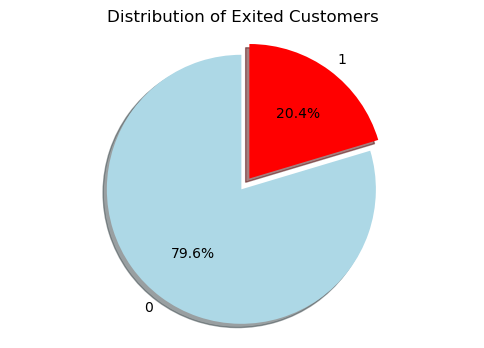

In [14]:
exited_counts = data['Exited'].value_counts()

plt.figure(figsize=(6, 4))  

plt.pie(exited_counts, 
        labels=exited_counts.index, 
        autopct='%1.1f%%',  
        startangle=90,      
        colors=['lightblue', 'red'], 
        explode = (0, 0.1), 
        shadow=True)      

plt.title('Distribution of Exited Customers')
plt.axis('equal')
plt.show()

In [15]:
data.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


In [16]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


# Splitting features and target

In [17]:
X = data.drop(columns=['Exited'], axis=1)
y = data[['Exited']]

In [18]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [19]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Split dataset into 70% train and 30% test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape

(7000, 11)

In [22]:
X_test.shape

(3000, 11)

# Decision Tree

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.8063333333333333

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2416
           1       0.50      0.53      0.52       584

    accuracy                           0.81      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.81      0.81      0.81      3000



In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2107,  309],
       [ 272,  312]], dtype=int64)

In [29]:
(2107+312)/ (2107+312+272+309)

0.8063333333333333

In [1]:
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

fig = px.imshow(cm_df, 
                text_auto=True, 
                color_continuous_scale="Viridis", 
                title="Confusion Matrix")

fig.update_layout(
    title={
        'text': "Confusion Matrix",
        'x': 0.5, 
        'xanchor': 'center' 
    },
    
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    coloraxis_showscale=True
)
fig.show()

NameError: name 'pd' is not defined

[Watch: Confusion Matrix Tutorial](https://www.youtube.com/watch?v=gVByQqLso-I)